In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn import svm
from matplotlib.colors import ListedColormap
from IPython.core.display import display, HTML
lemmatiser = WordNetLemmatizer()
from sklearn.utils import shuffle

In [2]:
data_table=pd.read_csv('author_text.csv')
data_table = shuffle(data_table)

def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation] #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a+=b+' '
    # 3. Removal of Stopwords
    return a
#     return [word for word in a.split() if word.lower() not 
#             in stopwords.words('english')]

y = data_table['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y) #[1, 0, 1, ..., 0, 1, 1] each text - numbber 0,1 - depending on author

In [3]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [4]:
data_table[:20]

,Unnamed: 0,Text,Author
5161,9,muddy yellow coat matched the bright flower. H...,SC
113,4156,"that it reflected them, invisible or not?",JR
9215,1931,Gamemakers must have been watching him. I dig ...,SC
8264,936,"of the woods, and of my father, and of my moth...",SC
6059,6138,Percy could be heard telling the other prefect...,JR
11100,4437,than usual. The waters cool and pleasant on my...,SC
1431,2209,pounding in my temples. It’s a relief to get t...,SC
4757,2764,bag in a relatively comfortable manner. I plac...,SC
4738,6146,"nerve and outstanding courage, I award Gryffin...",JR
4535,5454,"“Ah, that’ll be nice,” says Peeta, tightening ...",SC


For a moment, everything seems frozen in time. Then the apples spill to the ground and I’m
SC


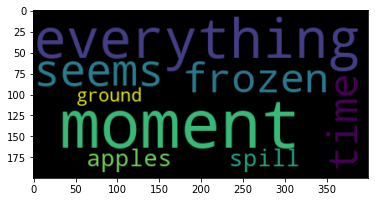

his eyes fixed on the door. Any second now, Professor McGonagall would come back and lead
JR


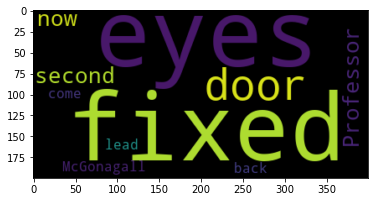

In [5]:
X = data_table['Text'] #всі частинки тексту

wordcloud2 = WordCloud().generate(X[1]) # for JR
wordcloud1 = WordCloud().generate(X[2]) # for SC

print(X[2])
print(data_table['Author'][2]) #author name
plt.imshow(wordcloud1, interpolation='bilinear') #показати картинкою
plt.show()

print(X[1])
print(data_table['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

In [7]:
X= X.apply(text_process)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234) #(80%->Training and 20%->Validation)

vectorizer = TfidfVectorizer()

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [22]:
print(test_vectors)

  (0, 273)	0.30059688269008344
  (0, 287)	0.3324304903262572
  (0, 337)	0.21618582518547816
  (0, 496)	0.09451168790763353
  (0, 1452)	0.3391689039860253
  (0, 3253)	0.11946344301655039
  (0, 3889)	0.4174923761626954
  (0, 4234)	0.1717277630158547
  (0, 4367)	0.22303365858230378
  (0, 6221)	0.24519337155462062
  (0, 6413)	0.13649956818790085
  (0, 6529)	0.09710017416626703
  (0, 6688)	0.39976821415382796
  (0, 7112)	0.33559848235956824
  (1, 173)	0.41596425956085453
  (1, 337)	0.5236519425954871
  (1, 4539)	0.43661793008900296
  (1, 5226)	0.4991810562839263
  (1, 7297)	0.33607355438359143
  (2, 95)	0.3774297190252052
  (2, 217)	0.09654235817161265
  (2, 219)	0.3190739448243771
  (2, 1689)	0.2976747366821395
  (2, 2526)	0.3997590081166738
  (2, 2853)	0.25157374838938273
  :	:
  (2582, 6985)	0.28992272275200603
  (2583, 173)	0.20035656729995965
  (2583, 217)	0.11263956735656408
  (2583, 496)	0.11026776932481383
  (2583, 972)	0.41639085224264466
  (2583, 1347)	0.23223186878766097
  (2583,

In [16]:
#svm classification
classifier_rbf = svm.SVC(C=10)
classifier_rbf.fit(train_vectors, y_train)

score_train1=classifier_rbf.score(train_vectors, y_train)
score_test1=classifier_rbf.score(test_vectors, y_test)
print(score_train1) #середня точність даних training
print(score_test1)#середня точність даних testing

0.9983558994197292
0.9098994586233565


In [17]:
classifier_linear=svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y_train)

score_train2=classifier_linear.score(train_vectors, y_train)
score_test2=classifier_linear.score(test_vectors, y_test)
print(score_train2) #середня точність даних training
print(score_test2)#середня точність даних testing

0.9608317214700194
0.9025522041763341


In [18]:
classifier_liblinear = svm.LinearSVC()
classifier_liblinear.fit(train_vectors, y_train)

score_train3=classifier_liblinear.score(train_vectors, y_train)
score_test3=classifier_liblinear.score(test_vectors, y_test)
print(score_train3) #середня точність даних training
print(score_test3)#середня точність даних testing

0.977852998065764
0.9048723897911833


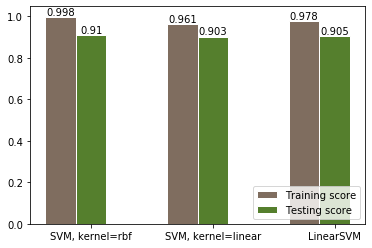

In [19]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth = 0.25
 
bars1 = [score_train1,score_train2,score_train3]
bars2 = [score_test1,score_test2,score_test3]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training score')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Testing score')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM, kernel=rbf', 'SVM, kernel=linear', 'LinearSVM'])
 
plt.legend(loc = 'lower right')

rects=[score_train1,score_test1,score_train2,score_test2,score_train3,score_test3]
labels = [round(x,3) for x in rects]

width=[0,0.25,1,1.25,2,2.25]
i=0
for rect, label in zip(rects, labels):
    height = rect
    plt.text(width[i], height + 0.0001, label,
            ha='center', va='bottom')
    i+=1


In [14]:
#0
#a="report home to the Dursleys saying that he’d somehow turned his teacher’s wig blue. He kept"
#0
# a="Samantha sometimes found Miles absurd and, increasingly, dull. Every now and then, though, she enjoyed his pomposity in precisely the same spirit as she liked"
#1
a="Deep in the meadow, hidden far away A cloak of leaves, a moonbeam ray Forget your woes and let your troubles lay And when it's morning again, they'll wash away Here it's safe, here it's warm Here the daisies guard you from every harm Here your dreams are sweet and tomorrow brings them true Here is the place where I love you."
b=np.array([a])
X_testSentence=pd.Series(b)

testSentance=vectorizer.transform(X_testSentence)
#JR - 0, SC - 1
print('Predicted value: ', classifier_rbf.predict(testSentance)) #should be 1

Predicted value:  [1]


In [15]:
predictions = classifier_rbf.predict(test_vectors)
# getting the Precision, Recall, F1-Score = 2 * (precision * recall) / (precision + recall)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1222
           1       0.89      0.91      0.90      1364

    accuracy                           0.90      2586
   macro avg       0.90      0.90      0.90      2586
weighted avg       0.90      0.90      0.90      2586



Normalized confusion matrix
[[0.87725041 0.12274959]
 [0.08577713 0.91422287]]


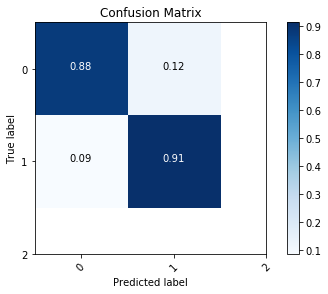

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2], normalize=True,
                      title='Confusion Matrix')


# Using Naive Bayes


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [74]:
from sklearn.naive_bayes import MultinomialNB
# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

train_naive=model.score(text_bow_train, y_train)
test_naive=model.score(text_bow_test, y_test)
print(train_naive)
print(test_naive)

0.7584139264990328
0.7625676720804331


# Using Logistic Regression

In [75]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


In [76]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_train_dtm, y_train)
logistic_test = clf.score(X_test_dtm, y_test)
logistic_train = clf.score(X_train_dtm, y_train)

# metrics.accuracy_score(y_test, y_pred_class)
print(logistic_train)
print(logistic_test)

0.9950676982591876
0.8789636504253674


C:\Users\kklak\AppData\Local\Programs\Python\Python36-32\Lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Comparing


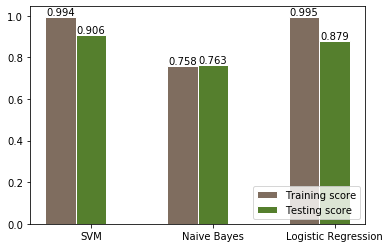

In [77]:
barWidth = 0.25
 
bars1 = [score_train1,train_naive,logistic_train]
bars2 = [score_test1,test_naive,logistic_test]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training score')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Testing score')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM', 'Naive Bayes', 'Logistic Regression'])
 
plt.legend(loc = 'lower right')

rects=[score_train1,score_test1,train_naive,test_naive,logistic_train,logistic_test]
labels = [round(x,3) for x in rects]

width=[0,0.25,1,1.25,2,2.25]
i=0
for rect, label in zip(rects, labels):
    height = rect
    plt.text(width[i], height + 0.0001, label,
            ha='center', va='bottom')
    i+=1


In [78]:
# with open('hunger_games.txt', encoding='utf-8', newline='') as f:
#     contents = f.read().replace('\n','')

# with open('hunger_games_splited.txt',  encoding='utf-8',mode='w') as f:
#     f.write(contents.replace('. ', '.\n'))
    
# with open('harry_potter.txt', encoding='utf-8', newline='') as f:
#     contents = f.read().replace('\n','')

# with open('harry_potter_splited.txt',  encoding='utf-8',mode='w') as f:
#     f.write(contents.replace('. ', '.\n'))

# file1=open('hunger_games_splited.txt',  encoding='utf-8', newline='')
# file2=open('harry_potter_splited.txt',  encoding='utf-8', newline='')
# with open('all_filw.txt',  encoding='utf-8',mode='w') as f:
#     for line in file1:
#         if not line.strip():continue
#         f.write(line)
#     for line in file2:
#         if not line.strip():continue
#         f.write(line)
# file=open('all_filw.txt',  encoding='utf-8',newline='')
# with open('all_films.csv',  encoding='utf-8',mode='w') as f:
    
#     for line in file:
#         if not line.strip():continue
#         f.write(line)
# file.close()


# data1 = pd.read_csv("hunger_games.csv") 
# data2 = pd.read_csv("harry_potter.csv") 

# frames=[data1,data2]
# result_file=pd.concat(frames)

# from sklearn.utils import shuffle
# df = shuffle(result_file)